In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# =========================
# 00: team–year 레이어
# =========================

bat = pd.read_csv("../data/processed/team_year_batting_2021_2025.csv")
pit = pd.read_csv("../data/processed/team_year_pitching_2021_2025.csv")

print("✅ Loaded team-year data")
display(bat.head())
display(pit.head())

✅ Loaded team-year data


,Year,Team,PA,AB,R,H,2B,3B,HR,TB,...,BB_HBP_PA,SO_PA,HR_PA,AVG_calc,OBP_calc,SLG_calc,ISO_calc,R_PA,H_minus_HR_PA,GDP_PA
0,2021,KIA,5577,4831,568,1198,183,21,66,1621,...,0.119778,0.165143,0.011834,0.247982,0.337066,0.335541,0.087560,0.101847,0.202977,0.021338
1,2021,KT,5626,4810,719,1276,219,11,106,1835,...,0.124778,0.186100,0.018841,0.265281,0.356012,0.381497,0.116216,0.127800,0.207963,0.018663
2,2021,LG,5533,4750,654,1188,210,11,110,1750,...,0.123983,0.167359,0.019881,0.250105,0.341908,0.368421,0.118316,0.118200,0.194831,0.018435
3,2021,NC,5530,4806,702,1254,203,17,170,2001,...,0.112477,0.197649,0.030741,0.260924,0.342899,0.416355,0.155431,0.126944,0.196022,0.016998
4,2021,SSG,5735,4898,755,1278,204,13,185,2063,...,0.127289,0.183958,0.032258,0.260923,0.353521,0.421192,0.160269,0.131648,0.190584,0.018483


,Year,Team,IP,H,HR,BB,SO,ER,FIP,BB_9,K_9,HR_9,ERA,H_9
0,2021,KIA,1261.0,1283,134,622,951,693,6.124828,4.439334,6.787470,0.956384,4.946075,9.157018
1,2021,KT,1258.4,1176,86,489,1062,518,4.702917,3.497298,7.595359,0.615067,3.704704,8.410680
2,2021,LG,1265.8,1126,80,545,1068,508,4.509375,3.875020,7.593617,0.568810,3.611945,8.006004
3,2021,NC,1249.9,1268,125,592,1055,634,5.461875,4.262741,7.596608,0.900072,4.565165,9.130330
4,2021,SSG,1252.4,1279,147,612,1003,677,6.042258,4.397956,7.207761,1.056372,4.865059,9.191153


In [4]:
# =========================
# 01: Strong Champion Model
# =========================

bat_champs = pd.read_csv("../data/artifacts/01_strong_champion_model_batting.csv")
pit_champs = pd.read_csv("../data/artifacts/01_strong_champion_model_pitching.csv")

print("✅ Loaded Strong Champion Models")
display(bat_champs.head())
display(pit_champs.head())

✅ Loaded Strong Champion Models


,Year,Team,PA,AB,R,H,2B,3B,HR,TB,...,SO_PA,HR_PA,AVG_calc,OBP_calc,SLG_calc,ISO_calc,R_PA,H_minus_HR_PA,GDP_PA,Team_norm
0,2021,KT,5626,4810,719,1276,219,11,106,1835,...,0.186100,0.018841,0.265281,0.356012,0.381497,0.116216,0.127800,0.207963,0.018663,KT
1,2022,SSG,5642,4893,720,1245,242,18,138,1937,...,0.190535,0.024459,0.254445,0.336029,0.395872,0.141427,0.127614,0.196207,0.017015,SSG
2,2023,LG,5687,4881,767,1364,227,27,93,1924,...,0.141375,0.016353,0.279451,0.361230,0.394182,0.114731,0.134869,0.223492,0.015650,LG
3,2024,KIA,5812,5124,858,1542,266,28,163,2353,...,0.157433,0.028045,0.300937,0.369471,0.459212,0.158275,0.147626,0.237268,0.020475,KIA
4,2025,LG,5711,4918,788,1366,219,19,130,2013,...,0.170723,0.022763,0.277755,0.360659,0.409313,0.131558,0.137979,0.216424,0.017335,LG


,Year,Team,IP,H,HR,BB,SO,ER,FIP,BB_9,K_9,HR_9,ERA,H_9,Team_norm
0,2021,KT,1258.4,1176,86,489,1062,518,4.702917,3.497298,7.595359,0.615067,3.704704,8.410680,KT
1,2022,SSG,1296.9,1223,130,457,1023,564,5.691724,3.171409,7.099237,0.902151,3.913949,8.487162,SSG
2,2023,LG,1284.7,1266,74,491,977,532,5.861515,3.439714,6.844399,0.518409,3.726940,8.868997,LG
3,2024,KIA,1281.4,1365,141,539,1123,643,5.621290,3.785703,7.887467,0.990323,4.516154,9.587170,KIA
4,2025,LG,1274.2,1236,91,491,1080,541,6.438333,3.468058,7.628316,0.642756,3.821221,8.730184,LG


In [5]:
# =========================
# 02 설정: 지표 정의
# =========================
BAT_POS = ["OBP", "BB_HBP_PA", "ISO", "HR_PA", "R_PA"]
BAT_NEG = ["SO_PA"]

PIT_POS = ["K_9"]
PIT_NEG = ["ERA", "FIP", "BB_9", "HR_9", "H_9"]

BAT_COLS = BAT_POS + BAT_NEG
PIT_COLS = PIT_POS + PIT_NEG

In [6]:
# =========================
# 가중치 (컨설팅 기준)
# =========================
BAT_W = {
    "OBP": 2.0, "R_PA": 2.0,
    "BB_HBP_PA": 1.0,
    "ISO": 1.0, "HR_PA": 1.0,
    "SO_PA": 1.0,
}

PIT_W = {
    "FIP": 2.0, "ERA": 1.5,
    "K_9": 1.0,
    "BB_9": 1.0, "HR_9": 1.0,
    "H_9": 0.5,
}

In [7]:
# =========================
# (A) 컬럼명 표준화: calc -> 표준명
# =========================
# strong batting
bat_champs = bat_champs.rename(columns={"OBP_calc": "OBP", "ISO_calc": "ISO"})
# team-year batting도 혹시 calc면 표준화
bat = bat.rename(columns={"OBP_calc": "OBP", "ISO_calc": "ISO"})

In [8]:
# =========================
# (B) Strong Model을 "연도별 1행"으로 강제 집계 (중복 merge 방지)
# =========================
# ⚠️ bat_champs / pit_champs에 Team이 있으면, 연도별로 여러 행일 가능성 높음
# 그래서 02에서는 Year별 1행 기준으로 사용
bat_champs_y = bat_champs.groupby("Year", as_index=False)[BAT_COLS].mean()
pit_champs_y = pit_champs.groupby("Year", as_index=False)[PIT_COLS].mean()

print("✅ Strong model shapes (Year-level):", bat_champs_y.shape, pit_champs_y.shape)
display(bat_champs_y.head())
display(pit_champs_y.head())

✅ Strong model shapes (Year-level): (5, 7) (5, 7)


,Year,OBP,BB_HBP_PA,ISO,HR_PA,R_PA,SO_PA
0,2021,0.356012,0.124778,0.116216,0.018841,0.127800,0.186100
1,2022,0.336029,0.110776,0.141427,0.024459,0.127614,0.190535
2,2023,0.361230,0.115351,0.114731,0.016353,0.134869,0.141375
3,2024,0.369471,0.101170,0.158275,0.028045,0.147626,0.157433
4,2025,0.360659,0.117493,0.131558,0.022763,0.137979,0.170723


,Year,K_9,ERA,FIP,BB_9,HR_9,H_9
0,2021,7.595359,3.704704,4.702917,3.497298,0.615067,8.410680
1,2022,7.099237,3.913949,5.691724,3.171409,0.902151,8.487162
2,2023,6.844399,3.726940,5.861515,3.439714,0.518409,8.868997
3,2024,7.887467,4.516154,5.621290,3.785703,0.990323,9.587170
4,2025,7.628316,3.821221,6.438333,3.468058,0.642756,8.730184


In [9]:
# =========================
# (C) Strong Model 기준 diff / advantage 계산
# =========================
def make_adv(df, strong_df_year, cols, neg_cols):
    out = df.copy()

    # merge on Year (strong_df_year는 Year별 1행이므로 안전)
    need = ["Year"] + cols
    missing = [c for c in need if c not in strong_df_year.columns]
    if missing:
        raise KeyError(f"Strong model missing columns: {missing}\n"
                       f"Strong columns: {strong_df_year.columns.tolist()}")

    out = out.merge(
        strong_df_year[need],
        on="Year",
        how="left",
        suffixes=("", "_strong")
    )

    for c in cols:
        out[f"{c}_diff"] = out[c] - out[f"{c}_strong"]
        # advantage 방향 통일 (작을수록 좋으면 부호 반전)
        out[f"{c}_adv"] = -out[f"{c}_diff"] if c in neg_cols else out[f"{c}_diff"]

    return out

bat_02 = make_adv(bat, bat_champs_y, BAT_COLS, BAT_NEG)
pit_02 = make_adv(pit, pit_champs_y, PIT_COLS, PIT_NEG)

print("✅ bat_02 / pit_02 created")
display(bat_02.head())
display(pit_02.head())

✅ bat_02 / pit_02 created


,Year,Team,PA,AB,R,H,2B,3B,HR,TB,...,BB_HBP_PA_diff,BB_HBP_PA_adv,ISO_diff,ISO_adv,HR_PA_diff,HR_PA_adv,R_PA_diff,R_PA_adv,SO_PA_diff,SO_PA_adv
0,2021,KIA,5577,4831,568,1198,183,21,66,1621,...,-0.005000,-0.005000,-0.028657,-0.028657,-0.007007,-0.007007,-0.025953,-0.025953,-0.020958,0.020958
1,2021,KT,5626,4810,719,1276,219,11,106,1835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
2,2021,LG,5533,4750,654,1188,210,11,110,1750,...,-0.000794,-0.000794,0.002100,0.002100,0.001040,0.001040,-0.009600,-0.009600,-0.018741,0.018741
3,2021,NC,5530,4806,702,1254,203,17,170,2001,...,-0.012300,-0.012300,0.039214,0.039214,0.011900,0.011900,-0.000856,-0.000856,0.011549,-0.011549
4,2021,SSG,5735,4898,755,1278,204,13,185,2063,...,0.002511,0.002511,0.044053,0.044053,0.013417,0.013417,0.003848,0.003848,-0.002142,0.002142


,Year,Team,IP,H,HR,BB,SO,ER,FIP,BB_9,...,ERA_diff,ERA_adv,FIP_diff,FIP_adv,BB_9_diff,BB_9_adv,HR_9_diff,HR_9_adv,H_9_diff,H_9_adv
0,2021,KIA,1261.0,1283,134,622,951,693,6.124828,4.439334,...,1.241370,-1.241370,1.421911,-1.421911,0.942036,-0.942036,0.341317,-0.341317,0.746338,-0.746338
1,2021,KT,1258.4,1176,86,489,1062,518,4.702917,3.497298,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
2,2021,LG,1265.8,1126,80,545,1068,508,4.509375,3.875020,...,-0.092759,0.092759,-0.193542,0.193542,0.377722,-0.377722,-0.046257,0.046257,-0.404676,0.404676
3,2021,NC,1249.9,1268,125,592,1055,634,5.461875,4.262741,...,0.860461,-0.860461,0.758958,-0.758958,0.765443,-0.765443,0.285005,-0.285005,0.719650,-0.719650
4,2021,SSG,1252.4,1279,147,612,1003,677,6.042258,4.397956,...,1.160355,-1.160355,1.339341,-1.339341,0.900658,-0.900658,0.441305,-0.441305,0.780473,-0.780473


In [10]:
# =========================
# (D) bat_02 + pit_02 결합
# =========================
df_02 = bat_02.merge(pit_02, on=["Year", "Team"], how="inner")
print("✅ merged df_02:", df_02.shape)
display(df_02[["Year","Team"]].head())

✅ merged df_02: (50, 78)


,Year,Team
0,2021,KIA
1,2021,KT
2,2021,LG
3,2021,NC
4,2021,SSG


In [11]:
# =========================
# (E) 연도별 z-score (adv 기준)
# =========================
def z_by_year(df, cols):
    out = df.copy()
    for c in cols:
        mu = out.groupby("Year")[c].transform("mean")
        sd = out.groupby("Year")[c].transform("std")
        out[f"{c}_z"] = ((out[c] - mu) / sd).fillna(0.0)
    return out

BAT_ADV = [f"{c}_adv" for c in BAT_COLS]
PIT_ADV = [f"{c}_adv" for c in PIT_COLS]
ADV_COLS = BAT_ADV + PIT_ADV

df_02 = z_by_year(df_02, ADV_COLS)
print("✅ z-score columns added")

✅ z-score columns added


In [12]:
# =========================
# (F) Off_Score / Pit_Score 계산
# =========================
def weighted_score(df, z_cols, weights):
    feats = [c.replace("_adv_z", "") for c in z_cols]
    w = np.array([weights.get(f, 1.0) for f in feats], dtype=float)
    w = w / w.sum()
    return df[z_cols].to_numpy(dtype=float) @ w

BAT_Z = [f"{c}_adv_z" for c in BAT_COLS]
PIT_Z = [f"{c}_adv_z" for c in PIT_COLS]

df_02["Off_Score"] = weighted_score(df_02, BAT_Z, BAT_W)
df_02["Pit_Score"] = weighted_score(df_02, PIT_Z, PIT_W)

display(df_02[["Year","Team","Off_Score","Pit_Score"]].head())

,Year,Team,Off_Score,Pit_Score
0,2021,KIA,-1.091583,-0.835205
1,2021,KT,0.435449,1.389323
2,2021,LG,-0.137541,1.489754
3,2021,NC,0.161541,0.051734
4,2021,SSG,1.013154,-0.687838


In [13]:
# =========================
# (G) Typology 분류
# =========================
def typology(off, pit):
    if off >= 0 and pit >= 0:
        return "Balanced Strong"
    if off < 0 and pit >= 0:
        return "Pitching-driven"
    if off >= 0 and pit < 0:
        return "Offense-driven"
    return "Overall Weak"

df_02["Typology"] = df_02.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)
df_02["Typology"].value_counts()

Typology
Balanced Strong    15
Overall Weak       14
Pitching-driven    13
Offense-driven      8
Name: count, dtype: int64

In [14]:
# =========================
# (H) Top drivers (우위/열위)
#    -> z-score 기준으로 3개씩 뽑기
# =========================
ADV_Z_COLS = BAT_Z + PIT_Z

def top_k(row, cols, k=3, desc=True):
    s = row[cols].sort_values(ascending=not desc)
    # 보기 좋게: "OBP_adv_z(+1.23)"처럼 나오니, 변수명도 깔끔히 줄이기
    pretty = []
    for name, val in s.head(k).items():
        pretty_name = name.replace("_adv_z","")   # "OBP"
        pretty.append(f"{pretty_name}({val:+.2f})")
    return ", ".join(pretty)

df_02["Top_Adv"] = df_02.apply(lambda r: top_k(r, ADV_Z_COLS, k=3, desc=True), axis=1)
df_02["Top_Gap"] = df_02.apply(lambda r: top_k(r, ADV_Z_COLS, k=3, desc=False), axis=1)

display(df_02[["Year","Team","Typology","Top_Adv","Top_Gap"]].head())

,Year,Team,Typology,Top_Adv,Top_Gap
0,2021,KIA,Overall Weak,"SO_PA(+0.77), BB_HBP_PA(+0.08), H_9(-0.38)","R_PA(-2.10), ISO(-1.65), HR_PA(-1.33)"
1,2021,KT,Balanced Strong,"BB_9(+1.73), FIP(+1.59), ERA(+1.40)","ISO(-0.33), HR_PA(-0.27), SO_PA(-0.19)"
2,2021,LG,Pitching-driven,"H_9(+2.09), FIP(+1.92), HR_9(+1.62)","OBP(-0.57), R_PA(-0.47), ISO(-0.24)"
3,2021,NC,Balanced Strong,"HR_PA(+1.53), ISO(+1.47), K_9(+0.78)","BB_HBP_PA(-0.91), SO_PA(-0.72), HR_9(-0.45)"
4,2021,SSG,Offense-driven,"HR_PA(+1.76), ISO(+1.69), BB_HBP_PA(+1.11)","HR_9(-1.42), ERA(-0.71), FIP(-0.70)"


In [15]:
# =========================
# (I) 1장 요약표(team-year) 저장
# =========================
summary_team_year = df_02[[
    "Year", "Team",
    "Off_Score", "Pit_Score",
    "Typology",
    "Top_Adv", "Top_Gap",
    # 스냅샷(원하면 더/덜)
    "OBP_diff", "R_PA_diff", "SO_PA_diff",
    "FIP_diff", "ERA_diff", "HR_9_diff"
]].sort_values(["Year","Off_Score","Pit_Score"], ascending=[True, False, False]).reset_index(drop=True)

out_path1 = "../data/artifacts/02_team_year_structural_diff_vs_strong_champion.csv"
summary_team_year.to_csv(out_path1, index=False, encoding="utf-8-sig")

print("✅ saved:", out_path1)
display(summary_team_year.head(20))

✅ saved: ../data/artifacts/02_team_year_structural_diff_vs_strong_champion.csv


,Year,Team,Off_Score,Pit_Score,Typology,Top_Adv,Top_Gap,OBP_diff,R_PA_diff,SO_PA_diff,FIP_diff,ERA_diff,HR_9_diff
0,2021,SSG,1.013154,-0.687838,Offense-driven,"HR_PA(+1.76), ISO(+1.69), BB_HBP_PA(+1.11)","HR_9(-1.42), ERA(-0.71), FIP(-0.70)",-0.002490,0.003848,-0.002142,1.339341,1.160355,0.441305
1,2021,KT,0.435449,1.389323,Balanced Strong,"BB_9(+1.73), FIP(+1.59), ERA(+1.40)","ISO(-0.33), HR_PA(-0.27), SO_PA(-0.19)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021,롯데,0.300027,-0.893723,Offense-driven,"OBP(+1.29), SO_PA(+0.58), K_9(+0.56)","ERA(-1.72), BB_HBP_PA(-1.18), BB_9(-1.13)",0.000177,-0.000835,-0.016872,1.448598,1.715343,0.337201
3,2021,두산,0.294611,0.126725,Balanced Strong,"R_PA(+0.78), SO_PA(+0.68), HR_9(+0.53)","BB_HBP_PA(-0.65), H_9(-0.56), HR_PA(-0.17)",-0.005949,0.002936,-0.019050,1.023417,0.585769,0.127378
4,2021,NC,0.161541,0.051734,Balanced Strong,"HR_PA(+1.53), ISO(+1.47), K_9(+0.78)","BB_HBP_PA(-0.91), SO_PA(-0.72), HR_9(-0.45)",-0.013113,-0.000856,0.011549,0.758958,0.860461,0.285005
5,2021,삼성,0.085925,0.087405,Balanced Strong,"BB_9(+0.98), SO_PA(+0.89), R_PA(+0.53)","BB_HBP_PA(-1.52), H_9(-0.70), HR_9(-0.69)",-0.012262,0.000443,-0.023636,0.976713,0.608349,0.325050
6,2021,키움,0.045364,-0.274311,Offense-driven,"HR_9(+0.65), R_PA(+0.48), BB_9(+0.36)","K_9(-2.18), HR_PA(-0.69), FIP(-0.45)",-0.008913,-0.000080,0.000173,1.191417,0.637307,0.108602
7,2021,LG,-0.137541,1.489754,Pitching-driven,"H_9(+2.09), FIP(+1.92), HR_9(+1.62)","OBP(-0.57), R_PA(-0.47), ISO(-0.24)",-0.014103,-0.009600,-0.018741,-0.193542,-0.092759,-0.046257
8,2021,KIA,-1.091583,-0.835205,Overall Weak,"SO_PA(+0.77), BB_HBP_PA(+0.08), H_9(-0.38)","R_PA(-2.10), ISO(-1.65), HR_PA(-1.33)",-0.018945,-0.025953,-0.020958,1.421911,1.241370,0.341317
9,2021,한화,-1.106945,-0.453865,Overall Weak,"BB_HBP_PA(+1.30), H_9(+0.65), HR_9(-0.00)","SO_PA(-2.40), OBP(-1.58), BB_9(-1.55)",-0.021882,-0.018791,0.047931,1.326771,0.981294,0.213994


In [16]:
# =========================
# (J) 팀별 5개년 평균 1장 요약 (포트폴리오용)
# =========================
team_avg = (
    df_02.groupby("Team", as_index=False)
    .agg({
        "Off_Score":"mean",
        "Pit_Score":"mean",
        "OBP_diff":"mean",
        "R_PA_diff":"mean",
        "SO_PA_diff":"mean",
        "FIP_diff":"mean",
        "ERA_diff":"mean",
        "HR_9_diff":"mean",
    })
)

team_avg["Typology"] = team_avg.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)
team_avg = team_avg.sort_values(["Off_Score","Pit_Score"], ascending=[False, False]).reset_index(drop=True)

out_path2 = "../data/artifacts/02_team_avg_2021_2025_typology_summary.csv"
team_avg.to_csv(out_path2, index=False, encoding="utf-8-sig")

print("✅ saved:", out_path2)
display(team_avg)

✅ saved: ../data/artifacts/02_team_avg_2021_2025_typology_summary.csv


,Team,Off_Score,Pit_Score,OBP_diff,R_PA_diff,SO_PA_diff,FIP_diff,ERA_diff,HR_9_diff,Typology
0,LG,0.898094,0.668209,-0.001418,-0.003313,-0.006666,-0.193684,-0.101039,-0.076954,Balanced Strong
1,KIA,0.324515,-0.123608,-0.009680,-0.010356,0.006967,-0.181729,0.573307,0.107983,Offense-driven
2,SSG,0.296954,-0.349967,-0.017270,-0.011165,0.019933,120.246898,0.483034,0.197905,Offense-driven
3,NC,0.284780,0.003886,-0.012846,-0.009256,0.022055,-0.193841,0.521981,0.143286,Balanced Strong
4,삼성,0.182003,-0.172488,-0.014353,-0.008888,0.012605,0.103238,0.496368,0.224569,Offense-driven
5,KT,-0.035092,0.615708,-0.013490,-0.013470,0.024701,-0.828974,0.165812,0.010660,Pitching-driven
6,두산,-0.171056,0.113475,-0.019227,-0.012509,0.015726,-0.346686,0.442039,0.051137,Pitching-driven
7,롯데,-0.181560,-0.248284,-0.012648,-0.012955,0.009976,68.456405,0.874242,0.062903,Overall Weak
8,한화,-0.738375,-0.125735,-0.024631,-0.020478,0.039923,18.436152,0.568577,0.058167,Overall Weak
9,키움,-0.860261,-0.381196,-0.024434,-0.021570,0.025928,0.158670,0.713967,0.081651,Overall Weak


In [39]:
import matplotlib.pyplot as plt

# =========================
# 팀 컬러 (없으면 기본값)
# =========================
TEAM_COLORS = {
    '한화': '#FC4E00', 
    'LG': '#C30452', 
    'KIA': '#EA0029', 
    'SSG': '#CE0E2D',
    '삼성':'#074CA1', 
    'NC':'#315288', 
    'KT':'#000000', 
    '롯데':'#041E42', 
    '두산':'#1A1748',
    '키움':'#570514',
    'KBO': '#003A8F'
}

# team_avg가 없다면 생성(안전장치)
if "team_avg" not in globals():
    team_avg = (
        df_02.groupby("Team", as_index=False)
        .agg({"Off_Score":"mean", "Pit_Score":"mean"})
    )
    team_avg["Typology"] = team_avg.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)

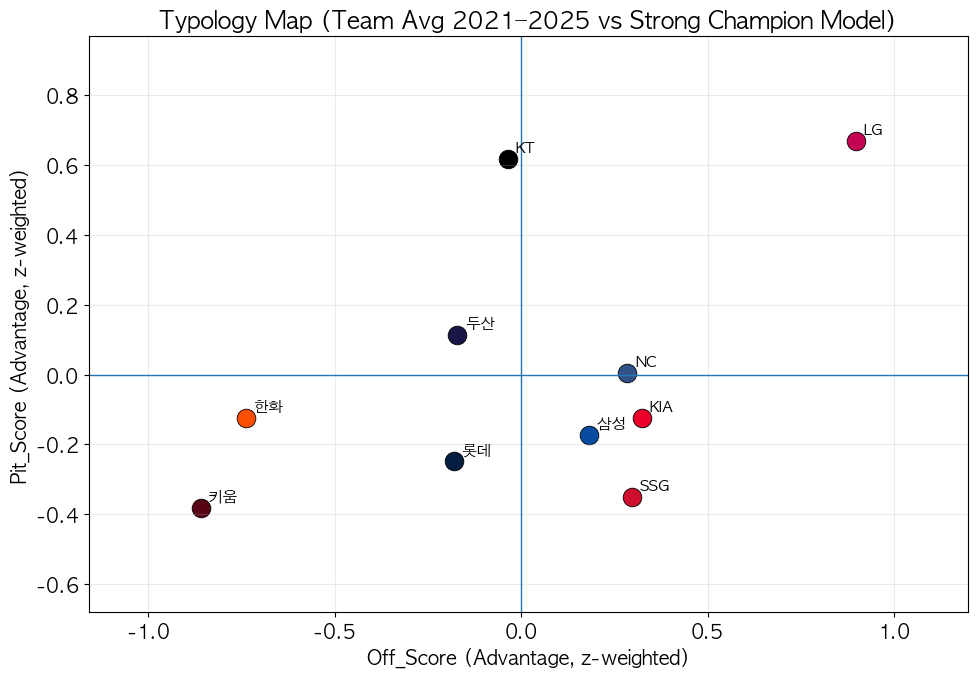

✅ saved figure: ../data/artifacts/02_typology_scatter_team_avg_2021_2025.png


In [40]:
# =========================
# 산점도
# =========================
plt.figure(figsize=(10, 7))

# 점 찍기 + 라벨
for _, r in team_avg.iterrows():
    team = r["Team"]
    x = r["Off_Score"]
    y = r["Pit_Score"]
    color = TEAM_COLORS.get(team, None)  # 없으면 matplotlib 기본색

    plt.scatter(x, y, s=180, c=color, edgecolors="black", linewidths=0.6)
    plt.text(x + 0.02, y + 0.02, team, fontsize=11)

# 기준선(0,0)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

plt.title("Typology Map (Team Avg 2021–2025 vs Strong Champion Model)")
plt.xlabel("Off_Score (Advantage, z-weighted)")
plt.ylabel("Pit_Score (Advantage, z-weighted)")
plt.grid(True, alpha=0.25)

# 범위 여백 조금
x_min, x_max = team_avg["Off_Score"].min(), team_avg["Off_Score"].max()
y_min, y_max = team_avg["Pit_Score"].min(), team_avg["Pit_Score"].max()
plt.xlim(x_min - 0.3, x_max + 0.3)
plt.ylim(y_min - 0.3, y_max + 0.3)

out_fig = "../data/artifacts/02_typology_scatter_team_avg_2021_2025.png"
plt.tight_layout()
plt.savefig(out_fig, dpi=200)
plt.show()

print("✅ saved figure:", out_fig)

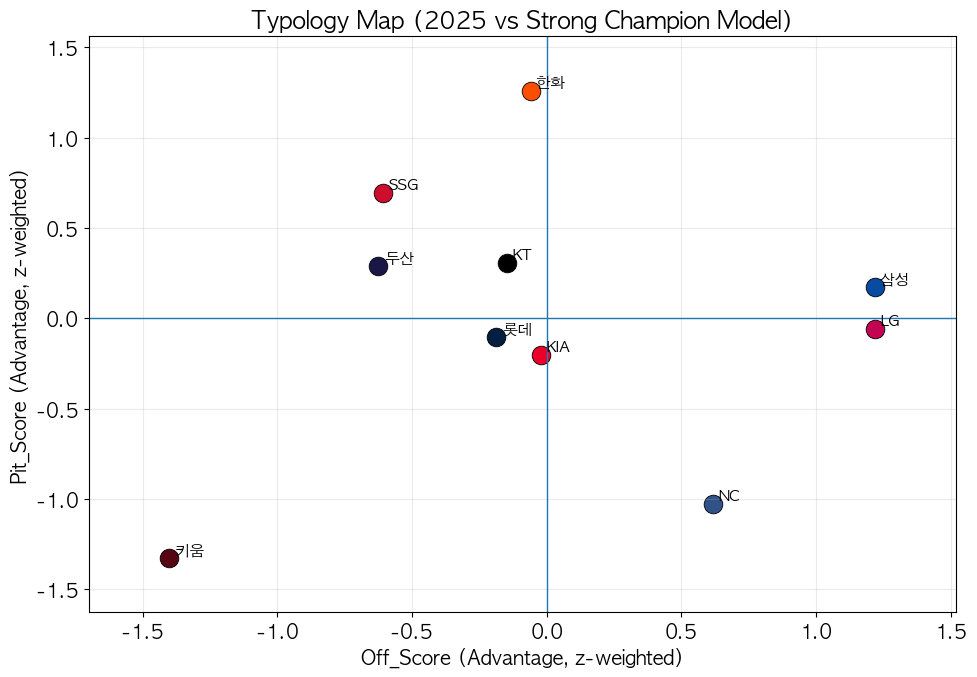

✅ saved figure: ../data/artifacts/02_typology_scatter_2025.png


In [41]:
df_2025 = df_02[df_02["Year"] == 2025][["Team","Off_Score","Pit_Score"]].copy()
df_2025["Typology"] = df_2025.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)

plt.figure(figsize=(10, 7))

for _, r in df_2025.iterrows():
    team = r["Team"]
    x = r["Off_Score"]
    y = r["Pit_Score"]
    color = TEAM_COLORS.get(team, None)

    plt.scatter(x, y, s=180, c=color, edgecolors="black", linewidths=0.6)
    plt.text(x + 0.02, y + 0.02, team, fontsize=11)

plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

plt.title("Typology Map (2025 vs Strong Champion Model)")
plt.xlabel("Off_Score (Advantage, z-weighted)")
plt.ylabel("Pit_Score (Advantage, z-weighted)")
plt.grid(True, alpha=0.25)

x_min, x_max = df_2025["Off_Score"].min(), df_2025["Off_Score"].max()
y_min, y_max = df_2025["Pit_Score"].min(), df_2025["Pit_Score"].max()
plt.xlim(x_min - 0.3, x_max + 0.3)
plt.ylim(y_min - 0.3, y_max + 0.3)

out_fig2 = "../data/artifacts/02_typology_scatter_2025.png"
plt.tight_layout()
plt.savefig(out_fig2, dpi=200)
plt.show()

print("✅ saved figure:", out_fig2)

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 안전장치: TEAM_COLORS 없으면 빈 dict
# -------------------------
if "TEAM_COLORS" not in globals():
    TEAM_COLORS = {}

In [43]:
# -------------------------
# team_avg / drivers 준비
#   - team_avg: Team별 Off/Pit 평균
#   - drivers: Team별 Top_Adv/Top_Gap (평균 기준으로 계산)
# -------------------------
if "team_avg" not in globals():
    team_avg = (
        df_02.groupby("Team", as_index=False)
        .agg({"Off_Score":"mean", "Pit_Score":"mean"})
    )
    team_avg["Typology"] = team_avg.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)

# Team별 driver는 "평균 z" 기준으로 다시 뽑는 게 깔끔함
# df_02에는 BAT_Z, PIT_Z 컬럼(예: OBP_adv_z 등)이 이미 있어야 함
ADV_Z_COLS = [c for c in df_02.columns if c.endswith("_adv_z")]

def _top_k_from_series(s, k=3, desc=True):
    s = s.sort_values(ascending=not desc)
    out = []
    for name, val in s.head(k).items():
        pretty_name = name.replace("_adv_z", "")
        out.append(f"{pretty_name}({val:+.2f})")
    return ", ".join(out)

drivers = (
    df_02.groupby("Team")[ADV_Z_COLS]
    .mean()
    .reset_index()
)

drivers["Top_Adv"] = drivers.apply(lambda r: _top_k_from_series(r[ADV_Z_COLS], k=3, desc=True), axis=1)
drivers["Top_Gap"] = drivers.apply(lambda r: _top_k_from_series(r[ADV_Z_COLS], k=3, desc=False), axis=1)

team_plot = team_avg.merge(drivers[["Team","Top_Adv","Top_Gap"]], on="Team", how="left")

In [44]:
# -------------------------
# 4분면 라벨 텍스트
# -------------------------
quad_labels = [
    ("Balanced Strong",   0.65, 0.65),
    ("Offense-driven",    0.65, 0.10),
    ("Pitching-driven",   0.10, 0.65),
    ("Overall Weak",      0.10, 0.10),
]

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

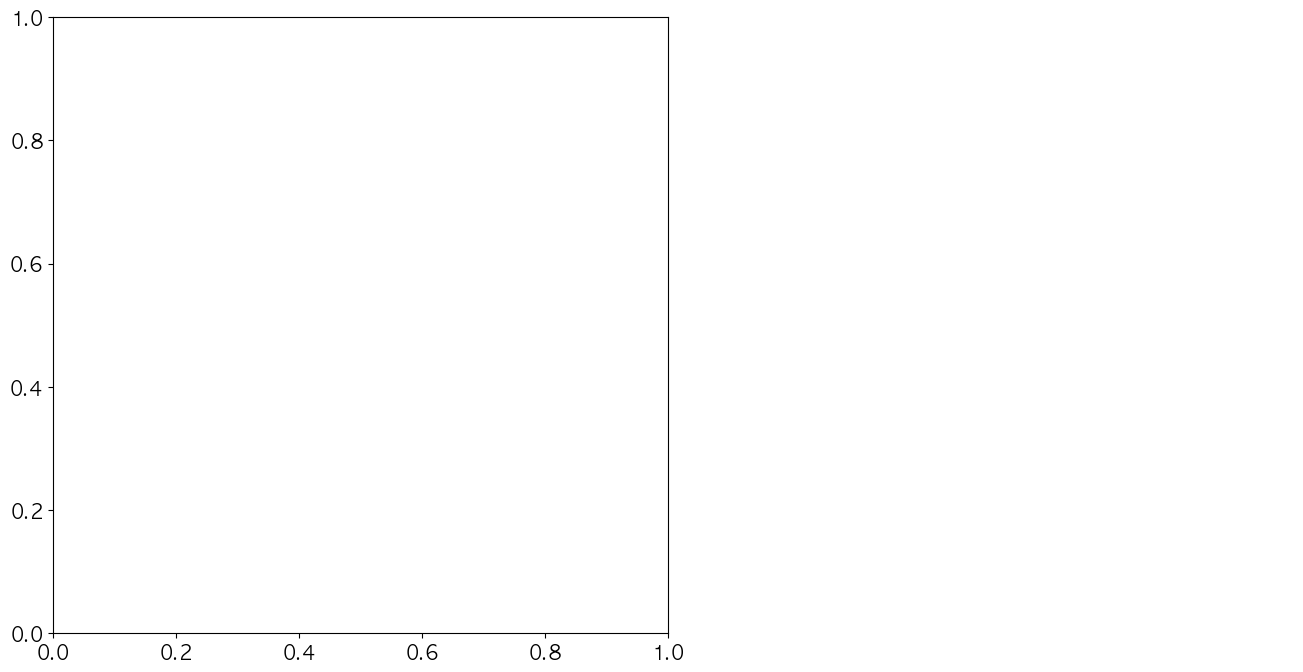

In [45]:
# -------------------------
# 그림 세팅 (좌: 산점도 / 우: driver 리스트)
# -------------------------
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1.0])

ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis("off")

In [46]:
# -------------------------
# 산점도
# -------------------------
for _, r in team_plot.iterrows():
    team = r["Team"]
    x = r["Off_Score"]
    y = r["Pit_Score"]
    color = TEAM_COLORS.get(team, None)

    ax.scatter(x, y, s=220, c=color, edgecolors="black", linewidths=0.7)
    ax.text(x + 0.02, y + 0.02, team, fontsize=11)

# 기준선
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

ax.set_title("02 Typology Map (Team Avg 2021–2025 vs Strong Champion Model)")
ax.set_xlabel("Off_Score (Advantage, z-weighted)")
ax.set_ylabel("Pit_Score (Advantage, z-weighted)")
ax.grid(True, alpha=0.25)

# 범위 자동 + 여백
x_min, x_max = team_plot["Off_Score"].min(), team_plot["Off_Score"].max()
y_min, y_max = team_plot["Pit_Score"].min(), team_plot["Pit_Score"].max()
ax.set_xlim(x_min - 0.35, x_max + 0.35)
ax.set_ylim(y_min - 0.35, y_max + 0.35)

(-0.7311963176628268, 1.0182090370948158)

In [47]:
# -------------------------
# 사분면 라벨(그림 좌표로 배치)
# -------------------------
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

def _to_data_coords(rx, ry):
    # rx, ry in [0,1] -> data coords
    return xmin + rx*(xmax-xmin), ymin + ry*(ymax-ymin)

for txt, rx, ry in quad_labels:
    xq, yq = _to_data_coords(rx, ry)
    ax.text(xq, yq, txt, fontsize=12, weight="bold", alpha=0.7)

In [48]:
# -------------------------
# 우측: 팀별 drivers 텍스트 박스
# -------------------------
ax2.set_title("Key Drivers (mean z-adv)", loc="left", fontsize=13, pad=10)

# 보기 좋게: Off_Score 내림차순 정렬
team_plot2 = team_plot.sort_values(["Off_Score","Pit_Score"], ascending=[False, False]).reset_index(drop=True)

lines = []
for _, r in team_plot2.iterrows():
    team = r["Team"]
    t = r["Typology"]
    adv = r.get("Top_Adv", "")
    gap = r.get("Top_Gap", "")
    lines.append(f"[{team}]  {t}\n  + {adv}\n  - {gap}\n")

text_block = "\n".join(lines)

ax2.text(
    0.02, 0.98,
    text_block,
    va="top", ha="left",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.6", alpha=0.08)
)
# -------------------------
# 저장
# -------------------------
out_onepager = "../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png"
plt.tight_layout()
plt.savefig(out_onepager, dpi=220)
plt.show()

print("✅ saved one-pager:", out_onepager)

<Figure size 1200x600 with 0 Axes>

✅ saved one-pager: ../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png


In [49]:
# -------------------------
# 저장
# -------------------------
out_onepager = "../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png"
plt.tight_layout()
plt.savefig(out_onepager, dpi=220)
plt.show()

print("✅ saved one-pager:", out_onepager)

<Figure size 1200x600 with 0 Axes>

✅ saved one-pager: ../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png


In [50]:
print("team_plot rows =", len(team_plot))
print(team_plot[["Team","Off_Score","Pit_Score"]].isna().sum())

team_plot rows = 10
Team         0
Off_Score    0
Pit_Score    0
dtype: int64


✅ team_plot rows: 10


,Team,Off_Score,Pit_Score,Typology
0,KIA,0.324515,-0.123608,Offense-driven
1,KT,-0.035092,0.615708,Pitching-driven
2,LG,0.898094,0.668209,Balanced Strong
3,NC,0.284780,0.003886,Balanced Strong
4,SSG,0.296954,-0.349967,Offense-driven
5,두산,-0.171056,0.113475,Pitching-driven
6,롯데,-0.181560,-0.248284,Overall Weak
7,삼성,0.182003,-0.172488,Offense-driven
8,키움,-0.860261,-0.381196,Overall Weak
9,한화,-0.738375,-0.125735,Overall Weak


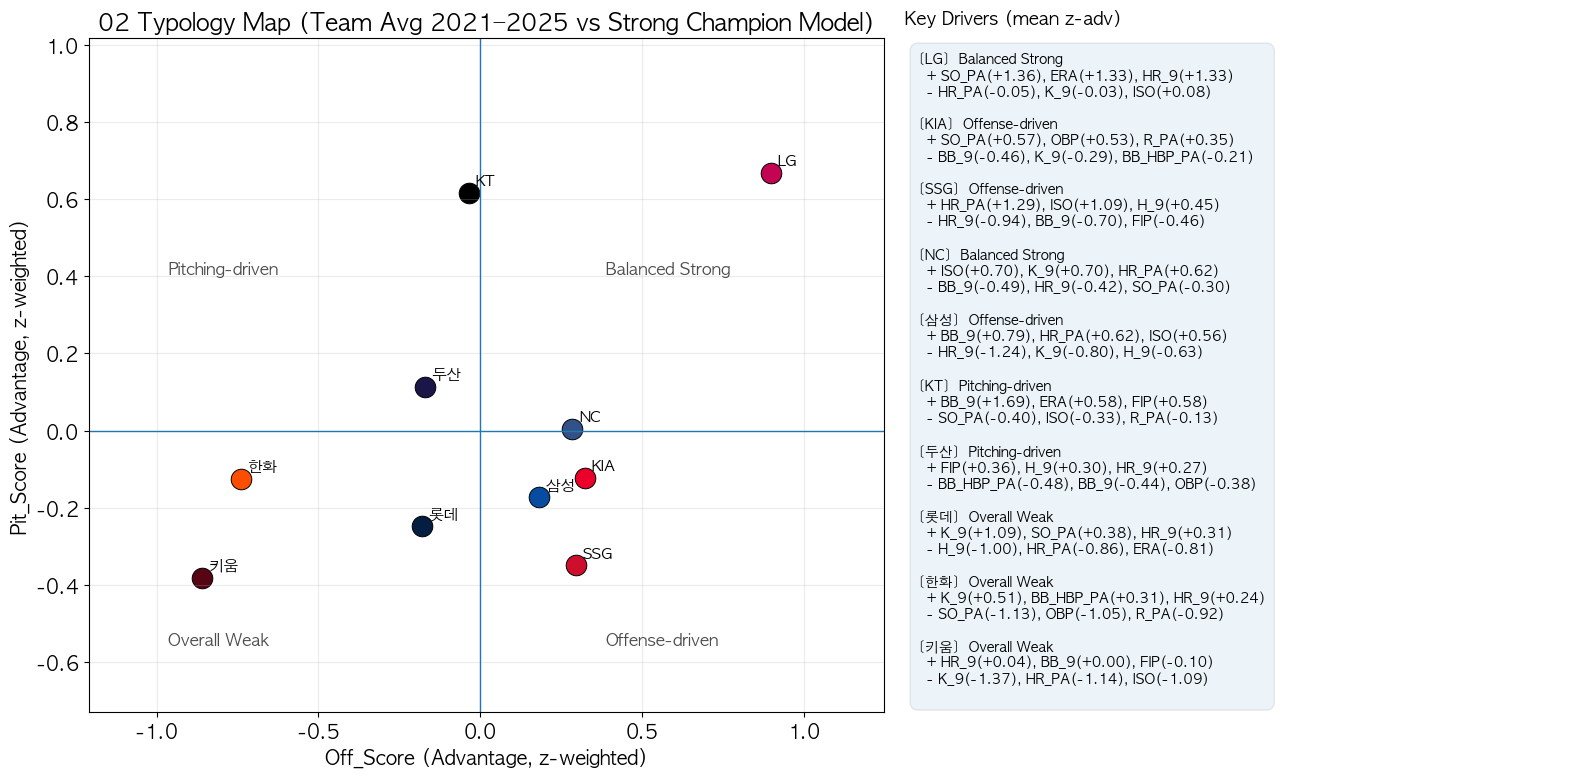

✅ saved one-pager: ../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# 0) TEAM_COLORS 없으면 빈 dict
if "TEAM_COLORS" not in globals():
    TEAM_COLORS = {}

# 1) team_avg / drivers 다시 만들기 (확실히 숫자형 + NaN 제거)
team_avg = (
    df_02.groupby("Team", as_index=False)
    .agg({"Off_Score":"mean", "Pit_Score":"mean"})
)

team_avg["Typology"] = team_avg.apply(lambda r: typology(r["Off_Score"], r["Pit_Score"]), axis=1)

# drivers: 팀별 mean z-adv 기반
ADV_Z_COLS = [c for c in df_02.columns if c.endswith("_adv_z")]
drivers = df_02.groupby("Team")[ADV_Z_COLS].mean().reset_index()

def _top_k_from_series(s, k=3, desc=True):
    s = s.sort_values(ascending=not desc)
    out = []
    for name, val in s.head(k).items():
        out.append(f"{name.replace('_adv_z','')}({val:+.2f})")
    return ", ".join(out)

drivers["Top_Adv"] = drivers.apply(lambda r: _top_k_from_series(r[ADV_Z_COLS], 3, True), axis=1)
drivers["Top_Gap"] = drivers.apply(lambda r: _top_k_from_series(r[ADV_Z_COLS], 3, False), axis=1)

team_plot = team_avg.merge(drivers[["Team","Top_Adv","Top_Gap"]], on="Team", how="left")

# ✅ 핵심: 숫자형 변환 + NaN 제거 (이거 안 하면 “점 0개”로 백지 저장 가능)
team_plot["Off_Score"] = pd.to_numeric(team_plot["Off_Score"], errors="coerce")
team_plot["Pit_Score"] = pd.to_numeric(team_plot["Pit_Score"], errors="coerce")
team_plot = team_plot.dropna(subset=["Off_Score","Pit_Score"]).copy()

print("✅ team_plot rows:", len(team_plot))
display(team_plot[["Team","Off_Score","Pit_Score","Typology"]])

# 2) 원페이저 그리기 (fig 객체로 저장)
quad_labels = [
    ("Balanced Strong",   0.65, 0.65),
    ("Offense-driven",    0.65, 0.10),
    ("Pitching-driven",   0.10, 0.65),
    ("Overall Weak",      0.10, 0.10),
]

fig = plt.figure(figsize=(16, 8), facecolor="white")
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1.0])

ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis("off")

# 산점도
for _, r in team_plot.iterrows():
    team = r["Team"]
    x = r["Off_Score"]
    y = r["Pit_Score"]
    color = TEAM_COLORS.get(team, "#1f77b4")  # 없으면 기본색(파랑)

    ax.scatter(x, y, s=220, c=color, edgecolors="black", linewidths=0.7)
    ax.text(x + 0.02, y + 0.02, team, fontsize=11)

ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
ax.grid(True, alpha=0.25)

ax.set_title("02 Typology Map (Team Avg 2021–2025 vs Strong Champion Model)")
ax.set_xlabel("Off_Score (Advantage, z-weighted)")
ax.set_ylabel("Pit_Score (Advantage, z-weighted)")

# 범위(점이 있는 경우에만 계산)
x_min, x_max = team_plot["Off_Score"].min(), team_plot["Off_Score"].max()
y_min, y_max = team_plot["Pit_Score"].min(), team_plot["Pit_Score"].max()
ax.set_xlim(x_min - 0.35, x_max + 0.35)
ax.set_ylim(y_min - 0.35, y_max + 0.35)

# 사분면 라벨
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

def _to_data_coords(rx, ry):
    return xmin + rx*(xmax-xmin), ymin + ry*(ymax-ymin)

for txt, rx, ry in quad_labels:
    xq, yq = _to_data_coords(rx, ry)
    ax.text(xq, yq, txt, fontsize=12, weight="bold", alpha=0.7)

# 우측 driver 박스
ax2.set_title("Key Drivers (mean z-adv)", loc="left", fontsize=13, pad=10)
team_plot2 = team_plot.sort_values(["Off_Score","Pit_Score"], ascending=[False, False]).reset_index(drop=True)

lines = []
for _, r in team_plot2.iterrows():
    lines.append(
        f"[{r['Team']}]  {r['Typology']}\n"
        f"  + {r.get('Top_Adv','')}\n"
        f"  - {r.get('Top_Gap','')}\n"
    )

ax2.text(
    0.02, 0.98,
    text_block,
    va="top", ha="left",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.6", alpha=0.08)
)

# ✅ 핵심: fig 기준으로 draw 후 저장
fig.tight_layout()
fig.canvas.draw()

out_onepager = "../data/artifacts/02_onepager_typology_map_with_drivers_2021_2025.png"
fig.savefig(out_onepager, dpi=220, facecolor="white", bbox_inches="tight")
plt.show()

print("✅ saved one-pager:", out_onepager)

In [52]:
df_02.to_csv("../data/artifacts/02_team_year_structural_full.csv", index=False, encoding="utf-8-sig")
print("✅ saved full:", "../data/artifacts/02_team_year_structural_full.csv")

✅ saved full: ../data/artifacts/02_team_year_structural_full.csv


---

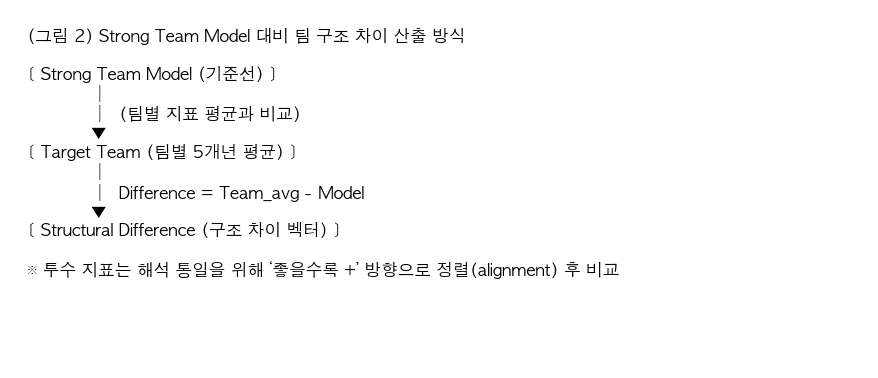

✅ Saved: ./artifacts/fig2_difference_diagram.png


In [53]:
import matplotlib.pyplot as plt
import os

OUT_DIR = "./artifacts"
os.makedirs(OUT_DIR, exist_ok=True)

fig, ax = plt.subplots(figsize=(9, 4))
ax.axis("off")

text = (
    "(그림 2) Strong Team Model 대비 팀 구조 차이 산출 방식\n\n"
    "[ Strong Team Model (기준선) ]\n"
    "            │\n"
    "            │  (팀별 지표 평균과 비교)\n"
    "            ▼\n"
    "[ Target Team (팀별 5개년 평균) ]\n"
    "            │\n"
    "            │  Difference = Team_avg - Model\n"
    "            ▼\n"
    "[ Structural Difference (구조 차이 벡터) ]\n\n"
    "※ 투수 지표는 해석 통일을 위해 ‘좋을수록 +’ 방향으로 정렬(alignment) 후 비교"
)

ax.text(0.02, 0.95, text, va="top", ha="left", fontsize=12)

save_path = os.path.join(OUT_DIR, "fig2_difference_diagram.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Saved:", save_path)


---
### 삼성과 비교 시작

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_2025/2659498499.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/jeongminpark/miniconda3/envs/kbo/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


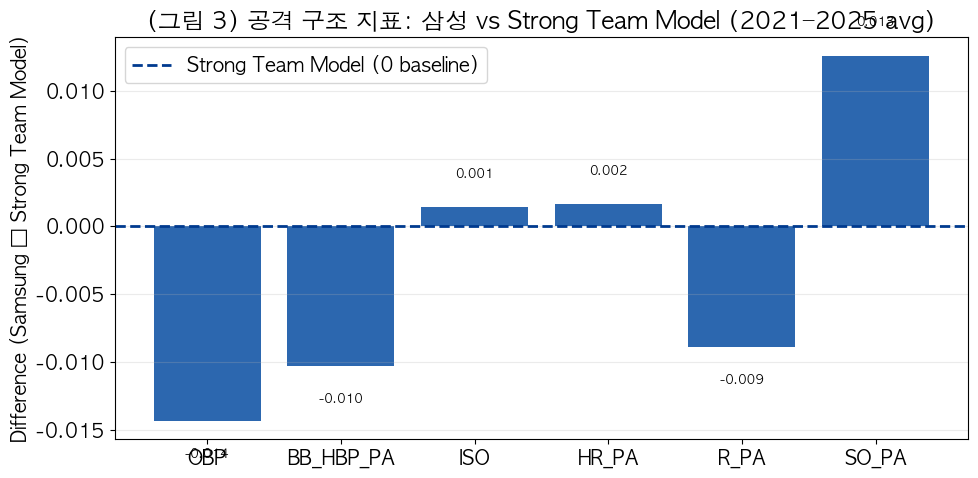

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 팀/색상
target_team = "삼성"
KBO_COLOR = TEAM_COLORS.get("KBO", "#003A8F")
TARGET_COLOR = TEAM_COLORS.get(target_team, "#074CA1")

# (A) 삼성의 연도별 diff -> 5개년 평균
diff_cols = [f"{c}_diff" for c in BAT_COLS]   # 예: OBP_diff, SO_PA_diff ...
samsung_diff_mean = (
    df_02.loc[df_02["Team"] == target_team, diff_cols]
      .mean(numeric_only=True)
)

# (B) 보기 좋게 Series index 정리 (OBP_diff -> OBP)
plot_index = [c.replace("_diff", "") for c in samsung_diff_mean.index]
plot_values = samsung_diff_mean.values

# (C) 바 차트
x = np.arange(len(plot_index))
plt.figure(figsize=(10, 5))

plt.bar(x, plot_values, color=TARGET_COLOR, alpha=0.85)
plt.axhline(0, color=KBO_COLOR, linewidth=2, linestyle="--", label="Strong Team Model (0 baseline)")

# 값 라벨(선택)
for i, v in enumerate(plot_values):
    plt.text(
        i, v + (0.002 if v >= 0 else -0.002),
        f"{v:.3f}",
        ha="center",
        va="bottom" if v >= 0 else "top",
        fontsize=9
    )

plt.xticks(x, plot_index, rotation=0)
plt.ylabel("Difference (Samsung − Strong Team Model)")
plt.title("(그림 3) 공격 구조 지표: 삼성 vs Strong Team Model (2021–2025 avg)")

plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

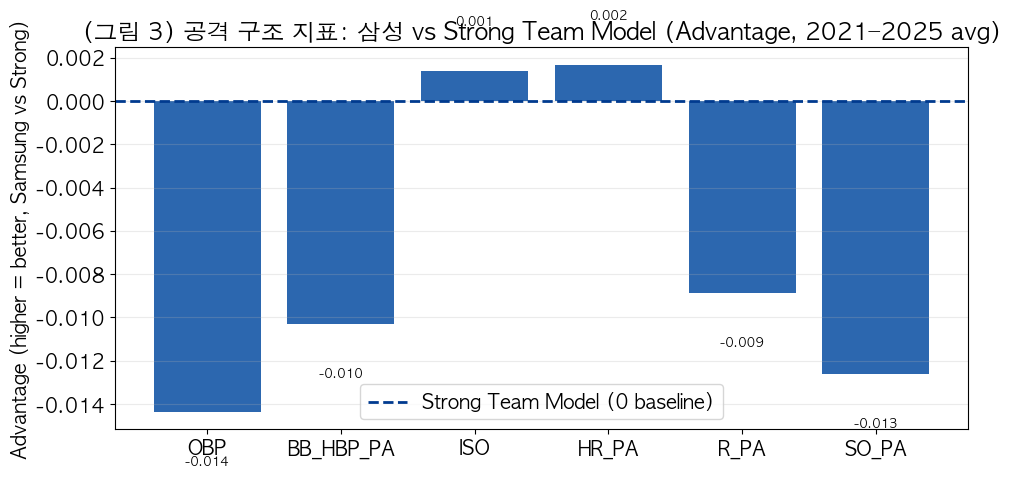

In [55]:
adv_cols = [f"{c}_adv" for c in BAT_COLS]  # 예: OBP_adv, SO_PA_adv ...
samsung_adv_mean = (
    df_02.loc[df_02["Team"] == target_team, adv_cols]
      .mean(numeric_only=True)
)

plot_index = [c.replace("_adv", "") for c in samsung_adv_mean.index]
plot_values = samsung_adv_mean.values

x = np.arange(len(plot_index))
plt.figure(figsize=(10, 5))

plt.bar(x, plot_values, color=TARGET_COLOR, alpha=0.85)
plt.axhline(0, color=KBO_COLOR, linewidth=2, linestyle="--", label="Strong Team Model (0 baseline)")

for i, v in enumerate(plot_values):
    plt.text(
        i, v + (0.002 if v >= 0 else -0.002),
        f"{v:.3f}",
        ha="center",
        va="bottom" if v >= 0 else "top",
        fontsize=9
    )

plt.xticks(x, plot_index, rotation=0)
plt.ylabel("Advantage (higher = better, Samsung vs Strong)")
plt.title("(그림 3) 공격 구조 지표: 삼성 vs Strong Team Model (Advantage, 2021–2025 avg)")

plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


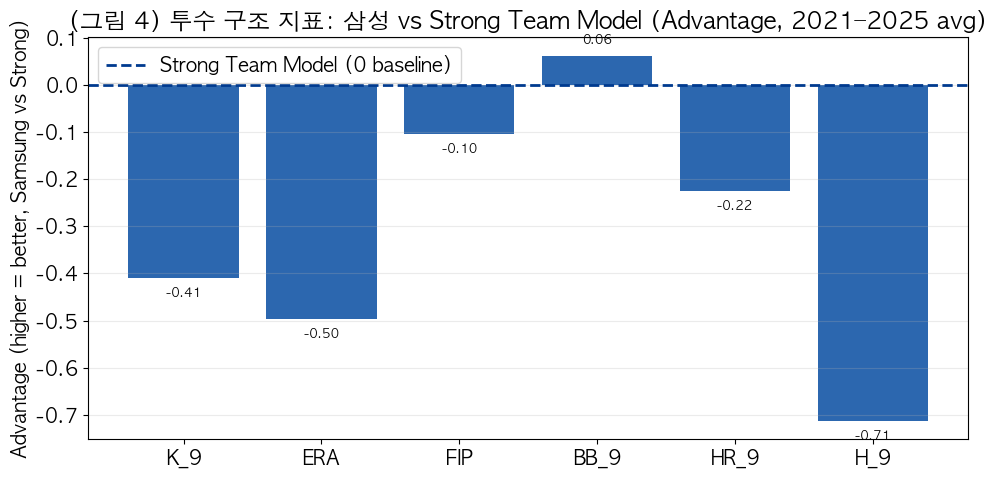

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 팀/색상
target_team = "삼성"
KBO_COLOR = TEAM_COLORS.get("KBO", "#003A8F")
TARGET_COLOR = TEAM_COLORS.get(target_team, "#074CA1")

# (A) 삼성의 연도별 adv -> 5개년 평균
adv_cols = [f"{c}_adv" for c in PIT_COLS]   # 예: ERA_adv, FIP_adv, K_9_adv ...
samsung_adv_mean_pit = (
    df_02.loc[df_02["Team"] == target_team, adv_cols]
      .mean(numeric_only=True)
)

# (B) 보기 좋게 이름 정리 (ERA_adv -> ERA)
plot_index = [c.replace("_adv", "") for c in samsung_adv_mean_pit.index]
plot_values = samsung_adv_mean_pit.values

# (C) 바 차트
x = np.arange(len(plot_index))
plt.figure(figsize=(10, 5))

plt.bar(x, plot_values, color=TARGET_COLOR, alpha=0.85)
plt.axhline(0, color=KBO_COLOR, linewidth=2, linestyle="--", label="Strong Team Model (0 baseline)")

# 값 라벨
for i, v in enumerate(plot_values):
    plt.text(
        i,
        v + (0.02 if v >= 0 else -0.02),
        f"{v:.2f}",
        ha="center",
        va="bottom" if v >= 0 else "top",
        fontsize=9
    )

plt.xticks(x, plot_index, rotation=0)
plt.ylabel("Advantage (higher = better, Samsung vs Strong)")
plt.title("(그림 4) 투수 구조 지표: 삼성 vs Strong Team Model (Advantage, 2021–2025 avg)")

plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_2025/2161350881.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/jeongminpark/miniconda3/envs/kbo/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


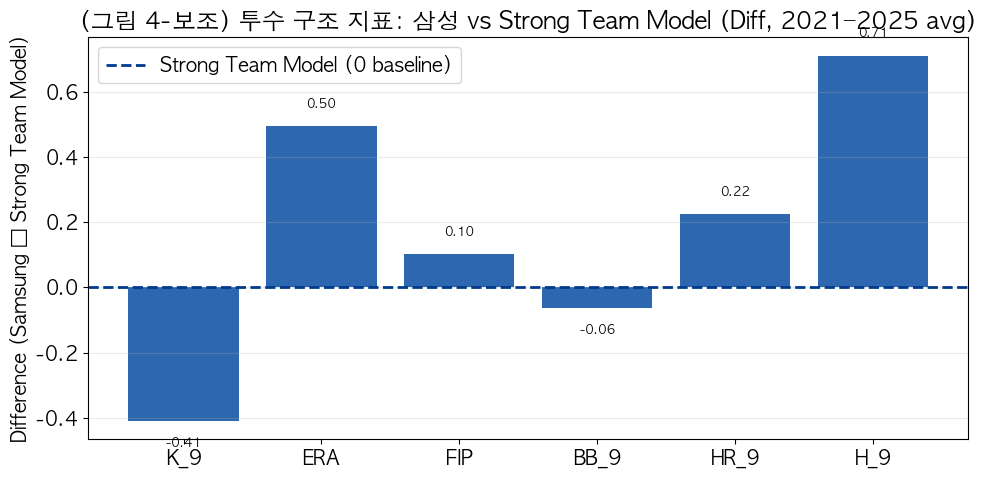

In [57]:
diff_cols = [f"{c}_diff" for c in PIT_COLS]   # 예: ERA_diff, FIP_diff ...
samsung_diff_mean_pit = (
    df_02.loc[df_02["Team"] == target_team, diff_cols]
      .mean(numeric_only=True)
)

plot_index = [c.replace("_diff", "") for c in samsung_diff_mean_pit.index]
plot_values = samsung_diff_mean_pit.values

x = np.arange(len(plot_index))
plt.figure(figsize=(10, 5))

plt.bar(x, plot_values, color=TARGET_COLOR, alpha=0.85)
plt.axhline(0, color=KBO_COLOR, linewidth=2, linestyle="--", label="Strong Team Model (0 baseline)")

for i, v in enumerate(plot_values):
    plt.text(
        i,
        v + (0.05 if v >= 0 else -0.05),
        f"{v:.2f}",
        ha="center",
        va="bottom" if v >= 0 else "top",
        fontsize=9
    )

plt.xticks(x, plot_index, rotation=0)
plt.ylabel("Difference (Samsung − Strong Team Model)")
plt.title("(그림 4-보조) 투수 구조 지표: 삼성 vs Strong Team Model (Diff, 2021–2025 avg)")

plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_2025/432543647.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


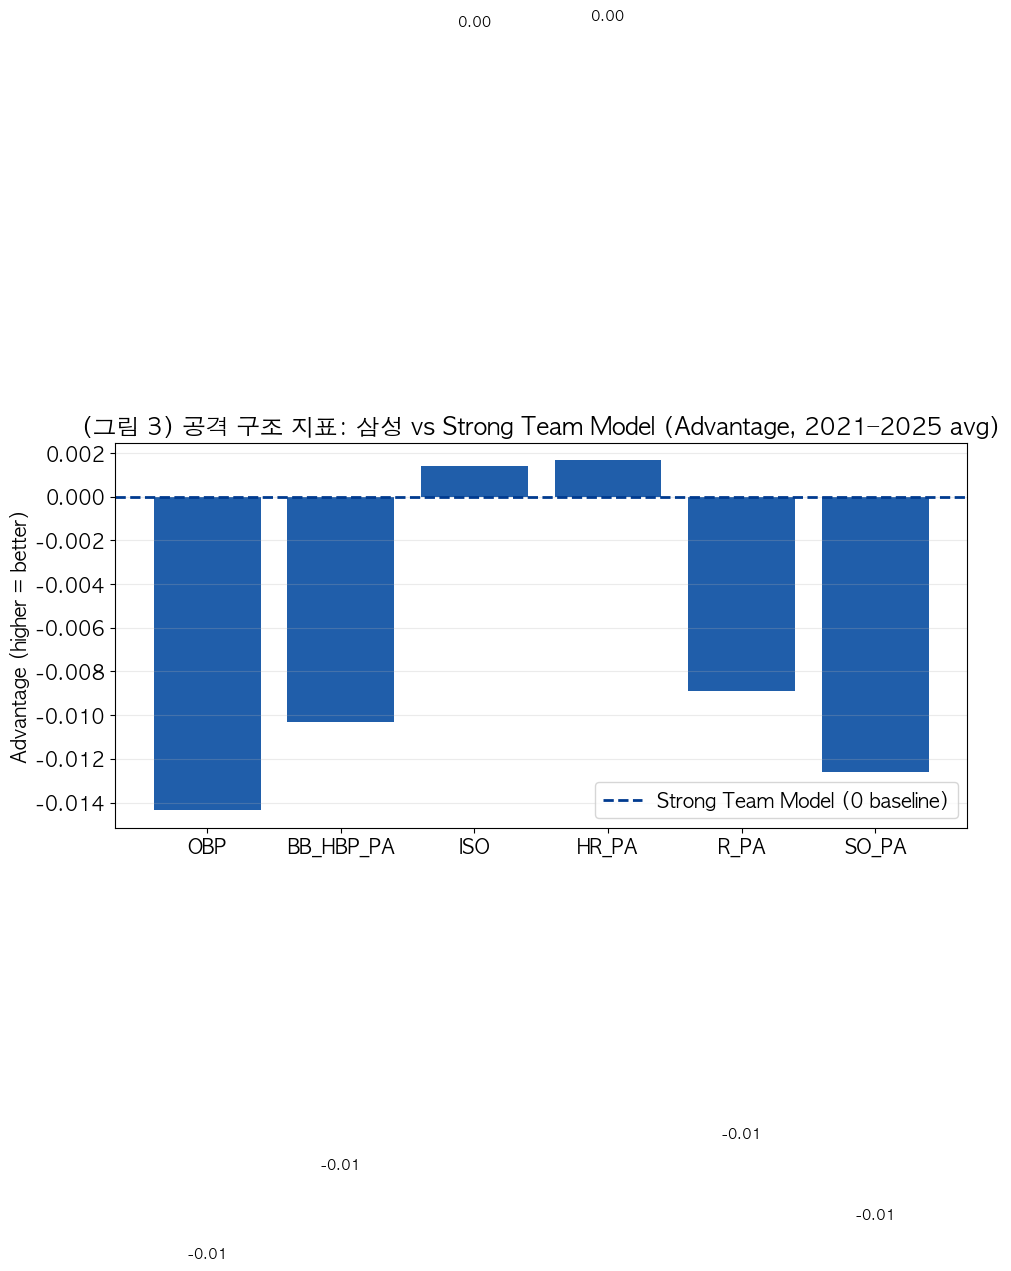

In [61]:
# 삼성의 5개년 평균 adv
adv_cols = [f"{c}_adv" for c in BAT_COLS]
samsung_adv_mean = df_02.loc[df_02["Team"]=="삼성", adv_cols].mean(numeric_only=True)

labels = [c.replace("_adv","") for c in samsung_adv_mean.index]
values = samsung_adv_mean.values

plt.figure(figsize=(11, 5))
plt.bar(labels, values, color="#074CA1", alpha=0.9)
plt.axhline(0, color=TEAM_COLORS["KBO"], linewidth=2, linestyle="--", label="Strong Team Model (0 baseline)")

for i, v in enumerate(values):
    plt.text(i, v + (0.02 if v>=0 else -0.02), f"{v:.2f}",
             ha="center", va="bottom" if v>=0 else "top", fontsize=10)

plt.ylabel("Advantage (higher = better)")
plt.title("(그림 3) 공격 구조 지표: 삼성 vs Strong Team Model (Advantage, 2021–2025 avg)")
plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

---